# Midterm A -  Fri 06, Nov 2020

**Scientific Programming - Data Science @ University of Trento**

## Download [exercises and solutions](../../../_static/generated/sciprog-ds-2020-11-06-exam.zip)



**Taking part to this exam erases any vote you had before**


1) Download  `sciprog-ds-2020-11-06-exam.zip` and extract it <b>on your desktop</b>.

2) Rename `sciprog-ds-2020-11-06-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `sciprog-ds-2020-11-06-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise. 

4) When done zip and send to [examina.icts.unitn.it/studente](http://examina.icts.unitn.it/studente)

## Music Sequencer

<div class="alert alert-warning">
    
**NOTICE: this part of the exam was ported to** [softpython](https://en.softpython.org/projects/music-sequencer/music-sequencer-sol.html) **website**
    
There you can find a more curated version (notice it may be longer than here)
</div>    

Open Jupyter and start editing this notebook `exam-2020-11-06.ipynb`

[ABC](http://abcnotation.com/wiki/abc:standard:v2.1#rrhythm) is a popular format to write music notation in plain text files, you can see an example by openining `tunes.abc` with a text editor. A music sequencer is an editor software which typically displays notes as a matrix: you will parse simplified abc tunes and display their melodies in a matrix.

## 1. parse_melody

Write a function which given a melody as a string of notes translates it to a list of tuples:

```python
>>> parse_melody("|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |")
[(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]
```

Each melody note is followed by its duration. If no duration number is specified, we assume it is one. 

Each tuple first element represents a note as a number from `0` (`A`) to `6` (`G`) and the second element is the note length in the sequencer. We assume our sequencer has a resolution of two beats per note, so for us a note `A` would have length `2`, a note `A2` a length `4`, a note `A3` a length `6` and so on.

* **DO NOT** care about spaces nor bars `|`, they have no meaning at all
* To get a character position, use `ord` python function

In [1]:

def parse_melody(melody):
    
    notes = melody.replace('|',' ').split()
    
    ret = []
    for note in notes:        
        n = ord(note[0])-ord('A')
        if len(note) == 1:
            ret.append((n,2))
        else:
            ret.append((n,2*int(note[1])))
    
    return ret
    

from pprint import pprint
melody1 = "|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |"
pprint(parse_melody(melody1) )

assert parse_melody("||") == []
assert parse_melody("|A|") == [(0,2)]
assert parse_melody("|A3|") == [(0,6)]
assert parse_melody("|A B|") == [(0,2), (1,2)]
assert parse_melody("|C D|") == [(2,2), (3,2)]
assert parse_melody(" | G    F  |   ") == [(6,2), (5,2)]
assert parse_melody("|D|B|") == [(3,2), (1,2)]
assert parse_melody("|D3 E4|") == [(3,6),(4,8)]
assert parse_melody("|F|A2 B|") == [(5,2),(0,4),(1,2)]
assert parse_melody("|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |") == \
       [(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]

[(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]


In [1]:

def parse_melody(melody):
    raise Exception('TODO IMPLEMENT ME !')

from pprint import pprint
melody1 = "|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |"
pprint(parse_melody(melody1) )

assert parse_melody("||") == []
assert parse_melody("|A|") == [(0,2)]
assert parse_melody("|A3|") == [(0,6)]
assert parse_melody("|A B|") == [(0,2), (1,2)]
assert parse_melody("|C D|") == [(2,2), (3,2)]
assert parse_melody(" | G    F  |   ") == [(6,2), (5,2)]
assert parse_melody("|D|B|") == [(3,2), (1,2)]
assert parse_melody("|D3 E4|") == [(3,6),(4,8)]
assert parse_melody("|F|A2 B|") == [(5,2),(0,4),(1,2)]
assert parse_melody("|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |") == \
       [(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]

[(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]


## 2. parse_tunes

An `.abc` file is a series of key:value fields. Keys are always one character long. Anything after a `%` is a comment and must be ignored

File `tunes.abc` excerpt:

In [2]:
with open("tunes.abc", encoding='utf-8') as f: print(''.join(f.readlines()[0:17]))

%abc-2.1
H:Tune made in a dark algorithmic night    % history and origin in header, so replicated in all tunes!
O:Trento                                   

X:1                      % index
T:Algorave               % title
C:The Lord of the Loop   % composer
M:4/4                    % meter
K:C                      % key
|A4      C2  E2 |C4      E D C2 |C3    B3    G2 |   % melodies can also have a comment

X:2                      
T:Transpose Your Head
C:Matrix Queen  
M:3/4    
K:G
|F2  G4     |E4      E F|A2  B2  D2 |D3    E3   |C3    C3   |   



First lines (3 in the example) are the file header, separated by tunes with a blank line.

* first line must always be ignored
* fields specified in the file header must be copied in _all_ tunes

After the first blank line, there is the first tune:

* `X` is the tune index, convert it to integer
* `M` is the meter, convert it to a tuple of two integers
* `K` is the last field of metadata
*  melody line has no field key, it always follows line with `K` and it immediately begins with a pipe: convert it to list by calling `parse_melody`

Following tunes are separated by blank lines

Write a function `parse_tunes` which parses the file and outputs a list of dictionaries, one per tune. Use provided `field_names` to obtain dictionary keys. Full expected db is in `expected_db.py` file.

<div class="alert alert-warning">
  
**DO NOT write hundreds of** `ifs` 
    
Special keys are listed above, all others should be treated in a generic way        
</div>            

<div class="alert alert-warning">
  
**DO NOT assume header always contains** `'origin'` **and** `'history'`
    
It can contain _any_ field, which has to be then copied in all the tunes.
</div>            

In [3]:
field_names = {
    'O':'origin',
    'H':'history',
    'X':'index',
    'T':'title',    
    'C':'composer',
    'M':'meter',
    'K':'key',        
}

def parse_tunes(filename):
    
   
    with open('tunes.abc', encoding='utf-8') as f:
        f.readline()  # skips %abc-2.1
        tunes = []
        common = {}
        for line in f:
            #pprint(line)
            clean_line = line.split('%')[0].strip()
            if clean_line == '':
                tune = common.copy()
                tunes.append(tune)            
            elif len(tunes) > 0:      
                if 'key' in tune:
                    tune['melody'] = parse_melody(clean_line)
                else:                 
                    k,v = clean_line.split(':')
                    if k == 'X':    # index
                        vp = int(v)
                    elif k == 'M':  # meter
                        s = v.split('/')
                        vp = (int(s[0]), int(s[1]))
                    else:
                        vp = v
                    tune[field_names[k]] = vp
            else: # header
                couple = clean_line.split(':')
                common[field_names[couple[0]]] = couple[1]

        return tunes
    
    
tunes_db = parse_tunes('tunes.abc')
pprint(tunes_db[:2],width=150)


[{'composer': 'The Lord of the Loop',
  'history': 'Tune made in a dark algorithmic night',
  'index': 1,
  'key': 'C',
  'melody': [(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)],
  'meter': (4, 4),
  'origin': 'Trento',
  'title': 'Algorave'},
 {'composer': 'Matrix Queen',
  'history': 'Tune made in a dark algorithmic night',
  'index': 2,
  'key': 'G',
  'melody': [(5, 4), (6, 8), (4, 8), (4, 2), (5, 2), (0, 4), (1, 4), (3, 4), (3, 6), (4, 6), (2, 6), (2, 6)],
  'meter': (3, 4),
  'origin': 'Trento',
  'title': 'Transpose Your Head'}]


In [3]:
field_names = {
    'O':'origin',
    'H':'history',
    'X':'index',
    'T':'title',    
    'C':'composer',
    'M':'meter',
    'K':'key',        
}

def parse_tunes(filename):
    raise Exception('TODO IMPLEMENT ME !')
    
tunes_db = parse_tunes('tunes.abc')
pprint(tunes_db[:2],width=150)


[{'composer': 'The Lord of the Loop',
  'history': 'Tune made in a dark algorithmic night',
  'index': 1,
  'key': 'C',
  'melody': [(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)],
  'meter': (4, 4),
  'origin': 'Trento',
  'title': 'Algorave'},
 {'composer': 'Matrix Queen',
  'history': 'Tune made in a dark algorithmic night',
  'index': 2,
  'key': 'G',
  'melody': [(5, 4), (6, 8), (4, 8), (4, 2), (5, 2), (0, 4), (1, 4), (3, 4), (3, 6), (4, 6), (2, 6), (2, 6)],
  'meter': (3, 4),
  'origin': 'Trento',
  'title': 'Transpose Your Head'}]


In [4]:
assert tunes_db[0]['history']=='Tune made in a dark algorithmic night'
assert tunes_db[0]['origin']=='Trento'
assert tunes_db[0]['index']==1
assert tunes_db[0]['title']=='Algorave'
assert tunes_db[0]['composer']=='The Lord of the Loop'
assert tunes_db[0]['meter']==(4,4)
assert tunes_db[0]['key']== 'C'
assert tunes_db[0]['melody']==\
[(0, 8), (2, 4), (4, 4), (2, 8), (4, 2), (3, 2), (2, 4), (2, 6), (1, 6), (6, 4)]
assert tunes_db[1]['history']=='Tune made in a dark algorithmic night'
assert tunes_db[1]['origin']=='Trento'
assert tunes_db[1]['index']==2
assert tunes_db[1]['title']=='Transpose Your Head'
assert tunes_db[1]['composer']=='Matrix Queen'
assert tunes_db[1]['meter']==(3,4)
assert tunes_db[1]['key']== 'G'
assert tunes_db[1]['melody']==\
[(5, 4), (6, 8), (4, 8), (4, 2), (5, 2), (0, 4), (1, 4), (3, 4), (3, 6), (4, 6), (2, 6), (2, 6)]

## 3. sequencer

Write a function `sequencer` which takes a melody in text format and outputs a matrix of note events, as a list of strings.

The rows are all the notes on keyboard (we assume 7 notes without black keys) and the columns represent the duration of a note.

* a note start is marked with `<` character, a sustain with `=` character and end with `>`
* **HINT 1**: call `parse_melody` to obtain notes as a list of tuples (if you didn't manage to implement it copy expected list from `expected_db.py`)
* **HINT 2**: build first a list of list of characters, and only at the very end convert to a list of strings
* **HINT 3**: try obtaining the note letters for first column by using `ord` and `chr`

In [5]:
def sequencer(melody):
    
    notes = parse_melody(melody)
    length = 0
    for note in notes:
        length += note[1]
    ret = []
    
    work = [[' ']*(length+1) for i in range(7)]
    
    for i in range(7):
        work[i][0] = chr(ord('A')+i)
    
    j = 0
    for n,d in notes:        
        work[n][j+1] = '<'
        eqlen = d-2
        work[n][j+2 : j+eqlen+2] = '=' * eqlen   # cool slice writing
        work[n][j+d] = '>'
        j += d
    return [''.join(w) for w in work]
    

from pprint import pprint
melody1 =  "|A4      C2  E2 |C4      E D C2 |C3    B3    G2  |"
exp1 = [
           'A<======>                                        ', 
           'B                                      <====>    ', 
           'C        <==>    <======>    <==><====>          ', 
           'D                          <>                    ', 
           'E            <==>        <>                      ', 
           'F                                                ', 
           'G                                            <==>']

res1 = sequencer(melody1) 
print('  ' + melody1)
print()
pprint(res1)
assert res1 == exp1

  |A4      C2  E2 |C4      E D C2 |C3    B3    G2  |

['A<======>                                        ',
 'B                                      <====>    ',
 'C        <==>    <======>    <==><====>          ',
 'D                          <>                    ',
 'E            <==>        <>                      ',
 'F                                                ',
 'G                                            <==>']


In [5]:
def sequencer(melody):
    raise Exception('TODO IMPLEMENT ME !')

from pprint import pprint
melody1 =  "|A4      C2  E2 |C4      E D C2 |C3    B3    G2  |"
exp1 = [
           'A<======>                                        ', 
           'B                                      <====>    ', 
           'C        <==>    <======>    <==><====>          ', 
           'D                          <>                    ', 
           'E            <==>        <>                      ', 
           'F                                                ', 
           'G                                            <==>']

res1 = sequencer(melody1) 
print('  ' + melody1)
print()
pprint(res1)
assert res1 == exp1

  |A4      C2  E2 |C4      E D C2 |C3    B3    G2  |

['A<======>                                        ',
 'B                                      <====>    ',
 'C        <==>    <======>    <==><====>          ',
 'D                          <>                    ',
 'E            <==>        <>                      ',
 'F                                                ',
 'G                                            <==>']


In [6]:
from pprint import pprint
melody2 =  "|F2  G4     |E4      E F|A2  B2  D2 |D3    E3   |C3    C3   |"
exp2 =    ['A                        <==>                                ',
           'B                            <==>                            ',
           'C                                                <====><====>',
           'D                                <==><====>                  ',
           'E            <======><>                    <====>            ',
           'F<==>                  <>                                    ',
           'G    <======>                                                ']

res2 = sequencer(melody2) 
print('  ' + melody2)
print()
pprint(res2)
assert res2 == exp2

  |F2  G4     |E4      E F|A2  B2  D2 |D3    E3   |C3    C3   |

['A                        <==>                                ',
 'B                            <==>                            ',
 'C                                                <====><====>',
 'D                                <==><====>                  ',
 'E            <======><>                    <====>            ',
 'F<==>                  <>                                    ',
 'G    <======>                                                ']


## 4. plot_tune

Make it fancy: write a function which takes a tune dictionary from the db and outputs a plot

* use beats as xs, remembering the shortest note has two beats
* to increase thickness, use `linewidth=5` parameter

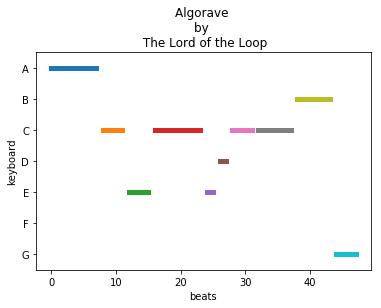

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_tune(tune):
    
   
    
    j = 0
    for n,d in tune['melody']:
        r = 6 - n
        xs = [j, j+d-1]
        ys = [r, r]
        j += d    
        plt.plot(xs, ys, linewidth=5)
    
    plt.title('%s \nby \n %s' %(tune['title'], tune['composer']))
    plt.ylim(-0.5,6.5)
    plt.yticks(range(7), [chr(ord('G')-i) for i in range(7)])
    plt.xlabel('beats')
    plt.ylabel('keyboard')
    
    
plot_tune(tunes_db[0])

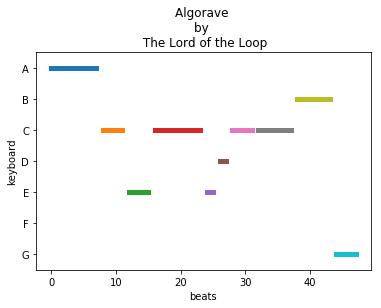

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_tune(tune):
    raise Exception('TODO IMPLEMENT ME !')
    
plot_tune(tunes_db[0])